In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# train and test dataframe
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

# for train data
x_train = train_data[:, 1:] / 255  #except first_col take all cols and rows
y_train = train_data[:, 0]   #take only first_col and all rows==> labels

# for test data
x_test = test_data[:, 1:] / 255  # normalizing the data = > range(0-1)
y_test = test_data[:, 0]

In [5]:
# split the training data into train and validate arrays
# test_size => 20% for validation

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

In [6]:
print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 784)
x_test shape: (10000, 784)
x_validate shape: (12000, 784)


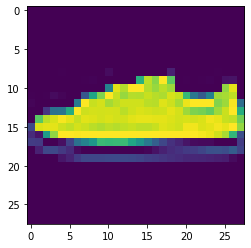

In [9]:

# lets see what the images look like
# reshape => to convert the sixple into the image
# img size = > 28 x 28

image = x_train[50, :].reshape((28,28))

plt.imshow(image)
plt.show()

In [10]:
# define the shape of the img

im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [11]:
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [12]:

import tensorflow as tf
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta

In [13]:
name='mymodel'
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=im_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-2'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=im_shape, name='Conv2D-3'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
], name=name)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
Conv2D-3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 9, 128)         0         
__________

In [16]:
#I have trained the model in 10 epochs becoz of time constraints , but for higher accuracy , go for 50 epochs
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])    
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=10, verbose=1,validation_data=(x_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 89s 2ms/sample - loss: 0.5894 - acc: 0.7833 - val_loss: 0.3868 - val_acc: 0.8618
Epoch 2/10
48000/48000 [==============================] - 88s 2ms/sample - loss: 0.4325 - acc: 0.8440 - val_loss: 0.3230 - val_acc: 0.8850
Epoch 3/10
48000/48000 [==============================] - 88s 2ms/sample - loss: 0.3722 - acc: 0.8653 - val_loss: 0.2890 - val_acc: 0.8950
Epoch 4/10
48000/48000 [==============================] - 90s 2ms/sample - loss: 0.3350 - acc: 0.8793 - val_loss: 0.2682 - val_acc: 0.9021
Epoch 5/10
48000/48000 [==============================] - 88s 2ms/sample - loss: 0.3135 - acc: 0.8862 - val_loss: 0.2588 - val_acc: 0.9057
Epoch 6/10
48000/48000 [==============================] - 90s 2ms/sample - loss: 0.2953 - acc: 0.8931 - val_loss: 0.2408 - val_acc: 0.9136
Epoch 7/10
48000/48000 [==============================] - 90s 2ms/sample - loss: 0.2765 - acc: 0.8986 - val_loss: 0.

{'mymodel': <tensorflow.python.keras.callbacks.History at 0x1b28f5c7748>}

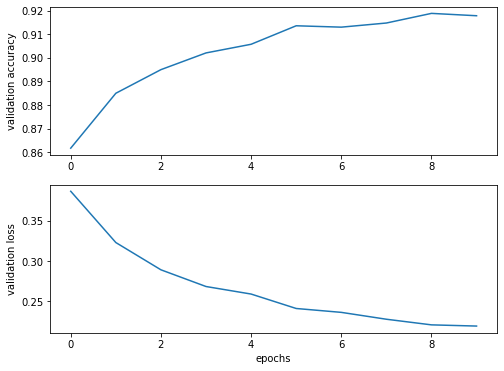

In [37]:
# plot the accuracy and loss

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
ax1.plot(val_acc, label=history)
ax2.plot(val_loss, label=history)
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
plt.show()

Predicting...


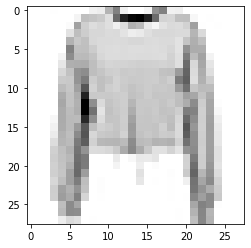


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Prediction from model  ==> 2


In [38]:
# Making Prediction from the train model
print("Predicting...")
image = x_test[50, :].reshape((28, 28))
plt.imshow(image, cmap="Greys")
plt.show()

pred = model.predict(x_test[50, :].reshape(1,28, 28,1))

labels_data = """
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
"""

print(labels_data)

print("Prediction from model  ==>", pred.argmax())

Predicting...


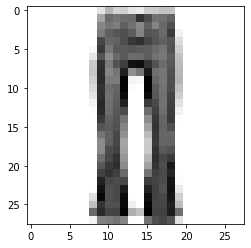


0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Prediction from model  ==> 1


In [42]:
# Making Prediction from the train model
print("Predicting...")
image = x_test[65, :].reshape((28, 28))
plt.imshow(image, cmap="Greys")
plt.show()

pred = model.predict(x_test[65, :].reshape(1,28, 28,1))

labels_data = """
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
"""

print(labels_data)

print("Prediction from model  ==>", pred.argmax())

In [43]:
score = model.evaluate(x_test, y_test, verbose=0)

print('model test loss: {:.4f}'.format(score[0]))
print(' model  test acc: {:.4f}'.format(score[1]))

model test loss: 0.2166
 model  test acc: 0.9204
